# Analysis of the Influences of GCN Layers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Read the CSV file

In [4]:
df = pd.read_csv('analyse.csv', sep=',')
df.head(10)

,table_name,column_name,columns_data_type,column_label,input_layer,hidden_layer1,hidden_layer2,output_layer
0,mlb_season_standings_2002,Tm,textual,baseball.team.name,"[-1.1039382219314575, -0.0, -0.514418542385101...","[0.3128851056098938, 0.9441991448402405, 0.406...","[0.06247218698263168, 0.1449873447418213, 0.12...","[-0.11190660297870636, -0.26525041460990906, -..."
1,mlb_season_standings_2002,W,numerical,baseball.team.wins,"[-1.1051034927368164, 0.6502475142478943, -0.8...","[0.5682380199432373, 0.8104931712150574, 0.535...","[0.4944540560245514, 0.7616901397705078, 0.728...","[-0.5026607513427734, -1.8738768100738525, -2...."
2,mlb_season_standings_2002,L,numerical,baseball.team.losses,"[-1.080060362815857, 0.3778511881828308, 0.543...","[0.7286397814750671, 1.0561437606811523, 1.125...","[0.26209473609924316, 1.0731390714645386, 0.77...","[-0.756049633026123, -1.9992914199829102, -3.0..."
3,mlb_season_standings_2002,W-L%,numerical,baseball.team.win_loss_percentage,"[-0.8662347793579102, -1.0288201570510864, 0.8...","[0.0, 2.014587640762329, 2.071485996246338, 2....","[0.0, 0.0, 1.1675958633422852, 1.6976588964462...","[-1.2338868379592896, -1.3250993490219116, -2...."
4,mlb_season_standings_2002,GB,numerical,baseball.team.games_behind,"[-0.7399901151657104, -0.8355400562286377, -1....","[0.528290867805481, 2.633394241333008, 0.25412...","[0.4296010136604309, 0.4498891830444336, 0.0, ...","[-0.8003311157226562, -1.0216679573059082, -2...."
5,mlb_season_team_pitching_stats_2001,Tm,textual,baseball.team.name,"[-1.0967448949813843, -0.06636711955070496, -0...","[0.049028873443603516, 0.3092234134674072, 0.1...","[0.0, 0.036620255559682846, 0.0266648866236209...","[-0.008921755477786064, -0.016527241095900536,..."
6,mlb_season_team_pitching_stats_2001,#P,numerical,baseball.team.number_of_players,"[-1.1006251573562622, 0.5934393405914307, -0.6...","[0.7538463473320007, 0.5094874501228333, 0.970...","[0.5267384052276611, 0.9689082503318787, 0.559...","[-0.3203539550304413, -1.2739219665527344, -1...."
7,mlb_season_team_pitching_stats_2001,PAge,numerical,baseball.team.average_age,"[-0.17338691651821136, -0.7549737691879272, -1...","[0.0, 2.282498359680176, 0.0, 0.90887719392776...","[0.2601068317890167, 0.0, 0.0, 0.0, 0.0, 0.033...","[-0.2683236002922058, 0.03632373362779617, -0...."
8,mlb_season_team_pitching_stats_2001,RA/G,numerical,baseball.team.runs_allowed_per_game,"[0.7476173639297485, -0.12685534358024597, -1....","[0.0005411023739725351, 1.563793659210205, 0.0...","[0.5384957194328308, 0.08739069849252701, 0.0,...","[-0.02956918440759182, -0.07767339795827866, -..."
9,mlb_season_team_pitching_stats_2001,W,numerical,baseball.team.wins,"[-1.1077123880386353, 0.480692982673645, -0.46...","[0.5244964361190796, 0.9427399039268494, 0.783...","[0.3376258313655853, 0.7304444313049316, 0.847...","[-0.3233626186847687, -1.3489388227462769, -1...."


In [5]:
df.describe()

,table_name,column_name,columns_data_type,column_label,input_layer,hidden_layer1,hidden_layer2,output_layer
count,2997,2997,2997,2997,2997,2997,2997,2997
unique,139,99,2,102,2961,2962,2962,2962
top,mlb_season_team_pitching_stats_2005,Tm,numerical,baseball.team.name,"[-0.9955307841300964, -0.4307440519332886, -0....","[0.7017772197723389, 1.0636335611343384, 1.022...","[0.16311699151992798, 1.1638725996017456, 0.84...","[-0.6628270745277405, -2.145338535308838, -2.9..."
freq,36,137,2449,138,6,6,6,6


In [6]:
df.shape

(2997, 8)

In [7]:
df.dtypes

table_name           object
column_name          object
columns_data_type    object
column_label         object
input_layer          object
hidden_layer1        object
hidden_layer2        object
output_layer         object
dtype: object

### Data Understanding

In [8]:
# Converting lists into numerical values
def parse_list(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

#### PCA-Analyse

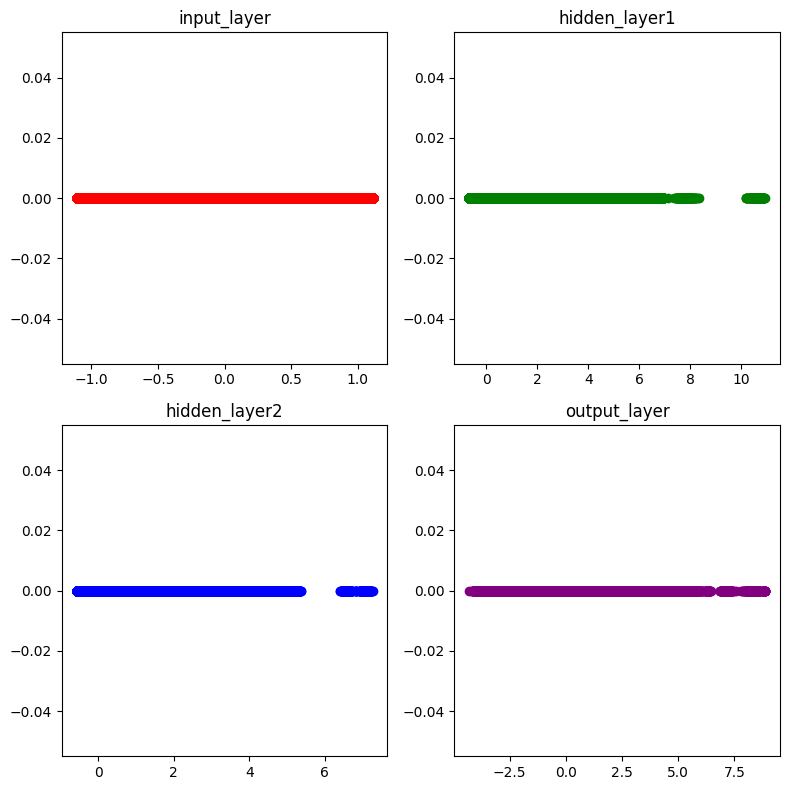

In [9]:
# PCA analysis one Dimension
df_one_dimension = df.head(1)
col_names = df_one_dimension.columns[4:]

colors = ['red', 'green', 'blue', 'purple']
num_cols = 2
num_rows = int(np.ceil(len(col_names) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 8))

for i, col in enumerate(col_names):
    data = df[col].apply(parse_list).values.tolist()
    vectors = np.array([item for sublist in data for item in sublist]).reshape(-1, 1)
    pca = PCA(n_components=1)
    transformed_data = pca.fit_transform(vectors)
    ax = axs[i // num_cols, i % num_cols]
    ax.scatter(transformed_data, [0]*len(transformed_data), color=colors[i])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [10]:
col_names = df.columns[4:]
colors = ['red', 'green', 'blue', 'purple']

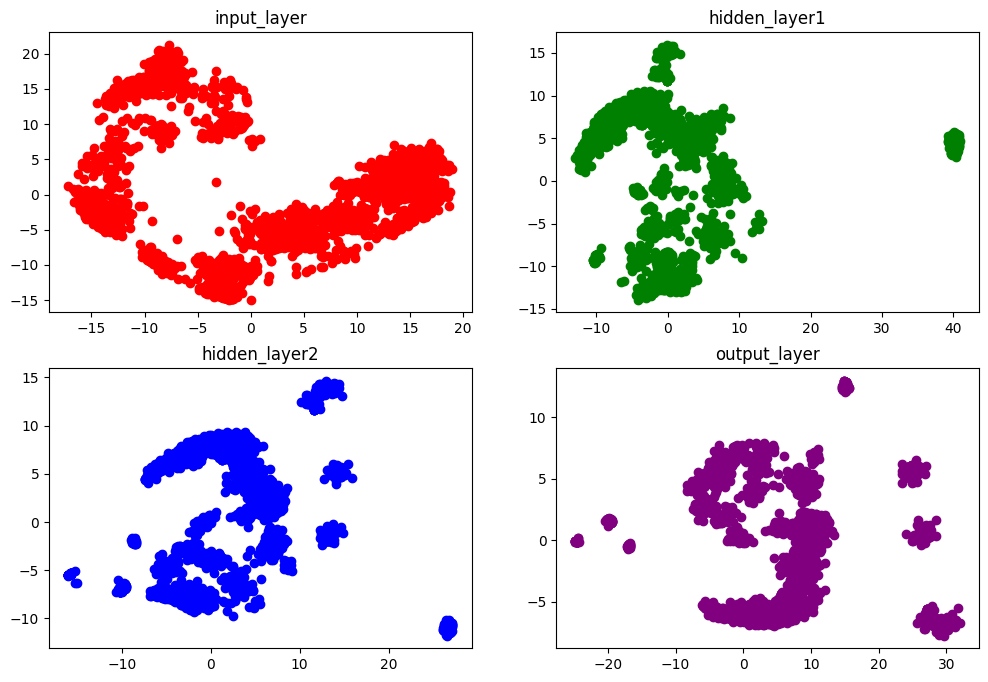

In [11]:
# PCA analysis of individual layers
num_cols = 2
num_rows = int(np.ceil(len(col_names) / num_cols))
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, col in enumerate(col_names):
    data = df[col].apply(parse_list).values
    vectors = np.array([np.array(x) for x in data])
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(vectors)
    ax = axs[i // num_cols, i % num_cols]
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], color=colors[i])
    ax.set_title(col)

plt.show()

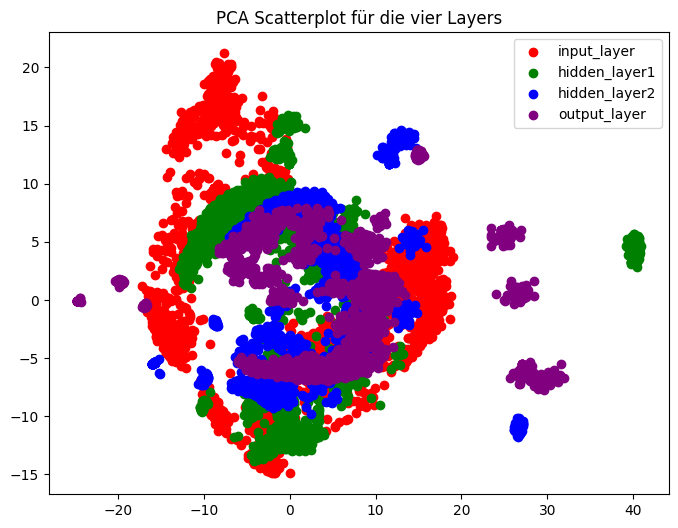

In [12]:
# PCA analysis all layers
fig, ax = plt.subplots(figsize=(8, 6))

for i, col in enumerate(col_names):
    data = df[col].apply(parse_list).values
    vectors = np.array([np.array(x) for x in data])
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(vectors)
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], color=colors[i], label=col)

ax.legend()
ax.set_title("PCA Scatterplot für die vier Layers")
plt.show()

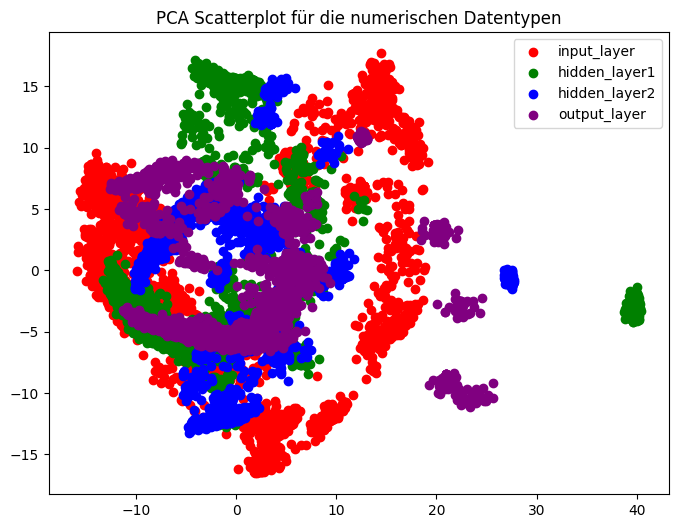

In [13]:
# PCA analysis all layers numerical datatyp
numerical_df = df[df['columns_data_type'] == 'numerical']
col_names = numerical_df.columns[4:]
colors = ['red', 'green', 'blue', 'purple']
fig, ax = plt.subplots(figsize=(8, 6))

for i, col in enumerate(col_names):
    data = numerical_df[col].apply(parse_list).values
    vectors = np.array([np.array(x) for x in data])
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(vectors)
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], color=colors[i], label=col)

ax.legend()
ax.set_title("PCA Scatterplot für die numerischen Datentypen")
plt.show()

#### t-SNE-Analyse

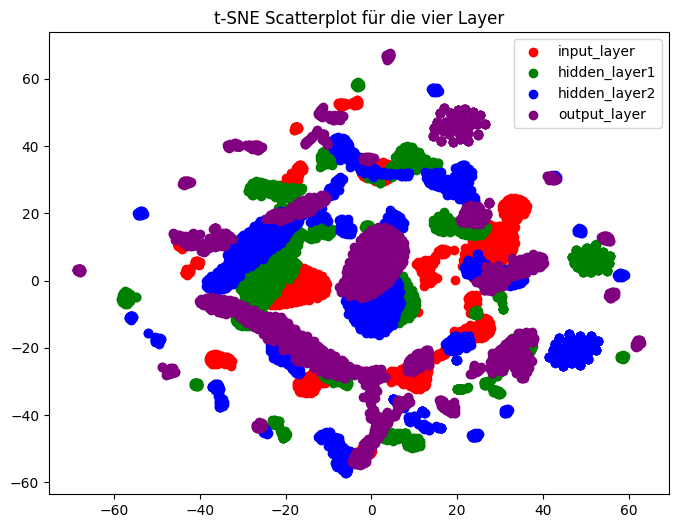

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, col in enumerate(col_names):
    data = df[col].apply(parse_list).values
    vectors = np.array([np.array(x) for x in data])
    tsne = TSNE(n_components=2, random_state=42)
    transformed_data = tsne.fit_transform(vectors)
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], color=colors[i], label=col)

ax.legend()
ax.set_title("t-SNE Scatterplot für die vier Layer")
plt.show()


#### Cosine similarity

In [15]:
input_vectors = []
hidden_layer1_vectors = []
hidden_layer2_vectors = []
output_vectors = []

for input_row, hidden1_row, hidden2_row, output_row in zip(df['input_layer'], df['hidden_layer1'], df['hidden_layer2'], df['output_layer']):
    input_vector_str = parse_list(input_row)
    input_vector = [float(x) for x in input_vector_str]
    input_vectors.append(input_vector[:300])
    
    hidden1_vector_str = parse_list(hidden1_row)
    hidden1_vector = [float(x) for x in hidden1_vector_str]
    hidden_layer1_vectors.append(hidden1_vector[:300])
    
    hidden2_vector_str = parse_list(hidden2_row)
    hidden2_vector = [float(x) for x in hidden2_vector_str]
    hidden_layer2_vectors.append(hidden2_vector[:300])
    
    output_vector_str = parse_list(output_row)
    output_vector = [float(x) for x in output_vector_str]
    output_vectors.append(output_vector[:300])

In [16]:
input_vectors = np.array(input_vectors)
hidden_layer1_vectors = np.array(hidden_layer1_vectors)
hidden_layer2_vectors = np.array(hidden_layer2_vectors)
output_vectors = np.array(output_vectors)

similarities_input_output = cosine_similarity(input_vectors, output_vectors)
similarities_hidden1_output = cosine_similarity(hidden_layer1_vectors, output_vectors)
similarities_hidden2_output = cosine_similarity(hidden_layer2_vectors, output_vectors)

print("Similarities Input-Output:")
print(similarities_input_output)
print()

print("Similarities HiddenLayer1-Output:")
print(similarities_hidden1_output)
print()

print("Similarities HiddenLayer2-Output:")
print(similarities_hidden2_output)
print()

Similarities Input-Output:
[[-0.0233951  -0.02678968 -0.02262489 ... -0.02243075 -0.02309866
  -0.02261019]
 [ 0.00337824  0.00154863  0.00776861 ... -0.0141488  -0.01325114
  -0.01432019]
 [-0.03889772 -0.04223129 -0.04072304 ... -0.01548483 -0.01547188
  -0.01605597]
 ...
 [ 0.08576742  0.08447061  0.08787844 ...  0.04717584  0.04910629
   0.04955639]
 [ 0.08082193  0.07902586  0.08230034 ...  0.04876591  0.05023562
   0.05049048]
 [ 0.08279557  0.0808254   0.08327438 ...  0.05452388  0.05590017
   0.05606702]]

Similarities HiddenLayer1-Output:
[[-0.36747501 -0.36062911 -0.36331557 ... -0.37517783 -0.37610942
  -0.37681084]
 [-0.36678323 -0.36077214 -0.36273462 ... -0.36906123 -0.37054767
  -0.37071311]
 [-0.33682908 -0.33126043 -0.33232921 ... -0.34457541 -0.34566558
  -0.34673806]
 ...
 [-0.37374732 -0.3616848  -0.36538765 ... -0.41005817 -0.40955889
  -0.40991335]
 [-0.37409178 -0.36257815 -0.36613817 ... -0.40643991 -0.40625832
  -0.40654137]
 [-0.36285556 -0.35146352 -0.3549994

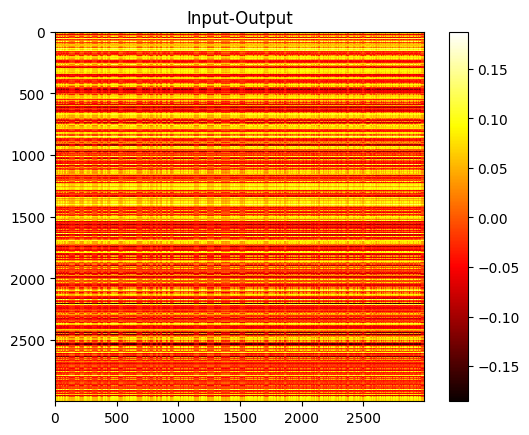

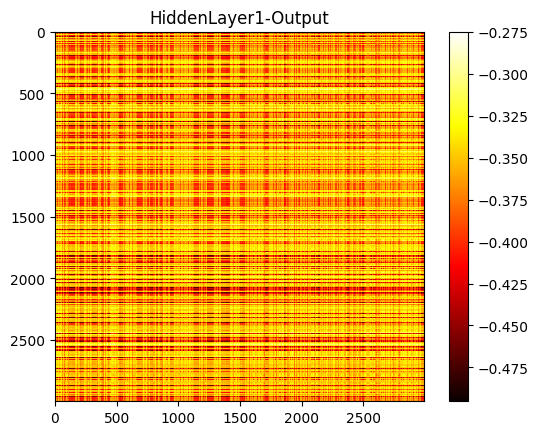

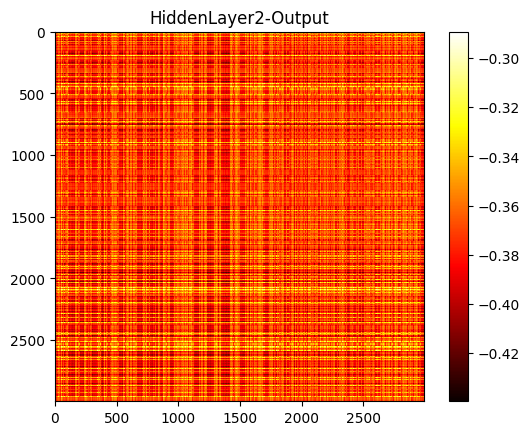

In [17]:
heatmaps = [similarities_input_output, similarities_hidden1_output,
            similarities_hidden2_output]

labels = ['Input-Output', 'HiddenLayer1-Output', 'HiddenLayer2-Output']

for heatmap, label in zip(heatmaps, labels):
    plt.figure()
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(label)
    plt.show()

### Vector representations of numeric Columns in the different GNN layers related to the Semantic Type Prediction Accuracy

In [18]:
numerical_vectors_input = []
numerical_vectors_layer1 = []
numerical_vectors_layer2 = []
numerical_vectors_output = []
labels_input = []
labels_layer1 = []
labels_layer2 = []
labels_output = []

for index, row in df.iterrows():
    if row['columns_data_type'] == 'numerical':
        numerical_vectors_input.append(parse_list(row['input_layer']))
        numerical_vectors_layer1.append(parse_list(row['hidden_layer1']))
        numerical_vectors_layer2.append(parse_list(row['hidden_layer2']))
        numerical_vectors_output.append(parse_list(row['output_layer']))
        labels_input.append(row['column_label'])
        labels_layer1.append(row['column_label'])
        labels_layer2.append(row['column_label'])
        labels_output.append(row['column_label'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(numerical_vectors_input, labels_input, test_size=0.2, random_state=20)

classifier_input = RandomForestClassifier()
classifier_input.fit(X_train, y_train)
predictions_input = classifier_input.predict(X_test)
accuracy_input = accuracy_score(y_test, predictions_input)

print("Metric für input_layer:")
print(f"Accuracy: {accuracy_input}")

classifier_layer1 = RandomForestClassifier()
classifier_layer1.fit(X_train, y_train)
predictions_layer1 = classifier_layer1.predict(X_test)
accuracy_layer1 = accuracy_score(y_test, predictions_layer1)

print("Metric für hidden_layer1:")
print(f"Accuracy: {accuracy_layer1}")

classifier_layer2 = RandomForestClassifier()
classifier_layer2.fit(X_train, y_train)
predictions_layer2 = classifier_layer2.predict(X_test)
accuracy_layer2 = accuracy_score(y_test, predictions_layer2)

print("Metric für hidden_layer2:")
print(f"Accuracy: {accuracy_layer2}")

classifier_output = RandomForestClassifier()
classifier_output.fit(X_train, y_train)
predictions_output = classifier_output.predict(X_test)
accuracy_output = accuracy_score(y_test, predictions_output)

print("Metric für output_layer:")
print(f"Accuracy: {accuracy_output}")

Metric für input_layer:
Accuracy: 0.673469387755102
Metric für hidden_layer1:
Accuracy: 0.6775510204081633
Metric für hidden_layer2:
Accuracy: 0.689795918367347
Metric für output_layer:
Accuracy: 0.6816326530612244
